In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from collections import Counter
from scipy.stats import iqr
import math
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from numpy import linalg as LA
import sklearn.neighbors
import sklearn.cluster as cluster
from sklearn import metrics
from scipy.spatial.distance import cdist


dataset = pd.read_csv('Groceries.csv')
new_data = dict(Counter(dataset['Customer']))
new_dataset = pd.DataFrame.from_dict(new_data,orient='index',columns=['#items'])
# new_dataset.hist(column='#items')
plt.hist(new_dataset['#items'])
plt.xlabel('No of Unique Items')
plt.ylabel('Frequency')
plt.title('Histogram')
plt.grid(True)
plt.show()
quartiles = np.percentile(new_dataset['#items'],[25,50,75])
print(quartiles,'25%, 50% / Median, 75% percentiles respectively')

#Methods to choose different no of bins

# N = math.ceil(np.sqrt(len(new_dataset)))
# print('Square Root Method')
# new_dataset.hist(column='#items',bins=N)

# sf = math.ceil(np.log(len(new_dataset)/np.log(2))) + 1
# print('Sturges Formula Method')
# new_dataset.hist(column='#items',bins=sf)
            
# rf = 2*np.cbrt(len(new_dataset))
# print('Rice Formula Method')
# new_dataset.hist(column='#items',bins=math.ceil(rf))
            
# n = np.max(new_dataset['#items']) - np.min(new_dataset['#items'])
# bs = n/ (3.5*np.std(new_dataset['#items']) / np.cbrt(len(new_dataset)))
# bf = n/(2*iqr(new_dataset['#items'])/np.cbrt(len(new_dataset)))
            
# print('Scott Forumula Method')
# new_dataset.hist(column='#items',bins=math.ceil(bs))
            
# print('Freedman-Diaconis Method')
# new_dataset.hist(column='#items',bins=math.ceil(bf))

<Figure size 640x480 with 1 Axes>

[2. 3. 6.] 25%, 50% / Median, 75% percentiles respectively


In [2]:
#support(X) = # T(X) / Total T
#confidence(X -> Y) = support(X U Y)/support(X)
#lift (X->Y) = support(X U Y)/support(X) * support(Y)
#conviction(X->Y) = 1-support(Y) / 1-confidence(X->Y)

listitem = dataset.groupby(['Customer'])['Item'].apply(list).values.tolist()
transactionEncoder = TransactionEncoder()
transactionEncoder_array = transactionEncoder.fit(listitem).transform(listitem)
TransactionTable = pd.DataFrame(transactionEncoder_array, columns=transactionEncoder.columns_)
# ItemIndicator.iloc[:,1]
TransactionTable

,Instant food products,UHT-milk,abrasive cleaner,artif. sweetener,baby cosmetics,baby food,bags,baking powder,bathroom cleaner,beef,...,turkey,vinegar,waffles,whipped/sour cream,whisky,white bread,white wine,whole milk,yogurt,zwieback
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9830,False,False,False,False,False,False,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
9831,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9832,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
9833,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [3]:
frequent_itemsets = apriori(TransactionTable, min_support = 0.0076258261311, max_len = 32, use_colnames = True)
print('\n All itemsets')
frequent_itemsets


 All itemsets


,support,itemsets
0,0.008033,(Instant food products)
1,0.033452,(UHT-milk)
2,0.017692,(baking powder)
3,0.052466,(beef)
4,0.033249,(berries)
...,...,...
519,0.007931,"(whipped/sour cream, whole milk, tropical fruit)"
520,0.015150,"(whole milk, tropical fruit, yogurt)"
521,0.010880,"(whipped/sour cream, whole milk, yogurt)"
522,0.007829,"(whole milk, other vegetables, yogurt, root ve..."


1228 associations rules where confidence metric is atleast 1% 


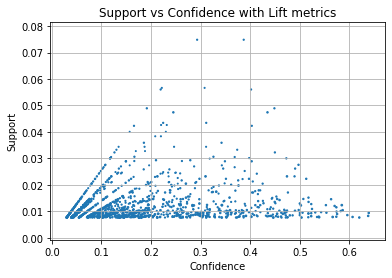

In [4]:
# max 4 items
as_rule = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.01)
print(len(as_rule), 'associations rules where confidence metric is atleast 1% ')
plt.scatter(as_rule['confidence'],as_rule['support'],s = as_rule['lift'])
plt.grid(True)
plt.xlabel("Confidence")
plt.ylabel("Support")
plt.title("Support vs Confidence with Lift metrics")
plt.show()


In [5]:
as_rule = association_rules(frequent_itemsets, metric = "confidence", min_threshold = 0.6)
as_rule
print('All consequents are whole milk')

All consequents are whole milk


In [6]:
spiral_dataset = pd.read_csv('Spiral.csv')
spiral_dataset[:10]

,id,x,y
0,1,1.390340,-0.018146
1,2,-1.136269,-1.093869
2,3,1.194276,0.205196
3,4,1.666396,0.348524
4,5,0.135881,-1.963015
5,6,-0.090122,-1.849551
6,7,1.407495,0.551644
7,8,0.641649,3.292957
8,9,-0.696579,-1.545402
9,10,1.228797,0.714833


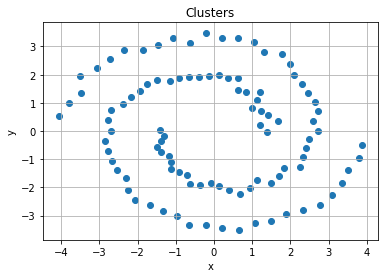

In [7]:
plt.scatter(spiral_dataset['x'],spiral_dataset['y'])
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Clusters')
plt.show()

Cluster Centroids = 
 [[ 0.96484522 -1.49548934]
 [-0.99860342  1.4777871 ]]

Cluster Label =  0
     id         x         y  KMeanCluster
0     1  1.390340 -0.018146             0
1     2 -1.136269 -1.093869             0
2     3  1.194276  0.205196             0
3     4  1.666396  0.348524             0
4     5  0.135881 -1.963015             0
5     6 -0.090122 -1.849551             0
6     7  1.407495  0.551644             0
8     9 -0.696579 -1.545402             0
9    10  1.228797  0.714833             0
13   14  0.388909 -2.109159             0
14   15  0.943091 -2.026133             0
20   21  2.729896  0.694061             0
22   23  2.248255 -1.260482             0
24   25  2.725883 -0.009425             0
25   26  1.496415 -1.829150             0
26   27  2.319737 -0.916160             0
29   30  2.412844 -0.607197             0
34   35  1.844366 -1.309854             0
37   38  0.683334 -2.232575             0
39   40 -1.177271 -0.895146             0
42   43  2.458237  1.

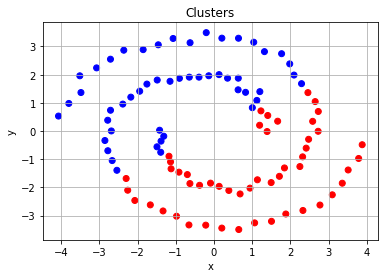

In [8]:
trainSet = spiral_dataset[['x','y']]
kmeans = cluster.KMeans(n_clusters=2,random_state=60616).fit(trainSet)
print("Cluster Centroids = \n", kmeans.cluster_centers_)

spiral_dataset['KMeanCluster'] = kmeans.labels_

color = []
for i in range(len(spiral_dataset)):
    if spiral_dataset['KMeanCluster'][i] == 0:
        color.append('red')
    elif spiral_dataset['KMeanCluster'][i] ==1:
        color.append('blue')
        
for i in range(2):
    print("\nCluster Label = ", i)
    print(spiral_dataset.loc[spiral_dataset['KMeanCluster'] == i])

plt.scatter(spiral_dataset[['x']], spiral_dataset[['y']],color=color)
plt.title('Clusters')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [9]:

kNNSpec = sklearn.neighbors.NearestNeighbors(n_neighbors = 3, algorithm = 'brute', metric = 'euclidean')
nbrs = kNNSpec.fit(trainSet)
distance, indexes = nbrs.kneighbors(trainSet)
distObject = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
distances = distObject.pairwise(trainSet)


Round Off mean and std
0.0707106781 0.0707106781
0.0707106781 0.0707106781


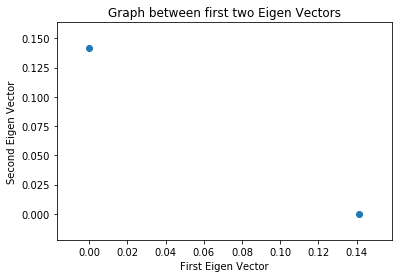

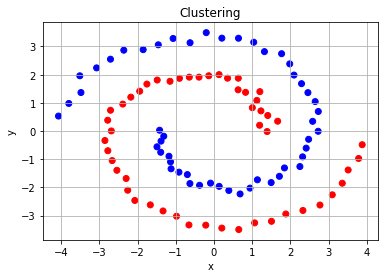

In [11]:

adj = np.zeros((spiral_dataset.shape[0], spiral_dataset.shape[0]))
deg = np.zeros((spiral_dataset.shape[0], spiral_dataset.shape[0]))

for i in range(spiral_dataset.shape[0]):
    for j in indexes[i]:
        if (i <= j):
            adj[i,j] = math.exp(- distances[i][j])
            adj[j,i] = adj[i,j]

for i in range(spiral_dataset.shape[0]):
    sum = 0
    for j in range(spiral_dataset.shape[0]):
        sum += adj[i,j]
    deg[i,i] = sum
        
Lmatrix = deg - adj


eigen_values, eigen_vectors = LA.eigh(Lmatrix)
# print(eigen_values)
# print(eigen_vectors)
E1 = eigen_vectors[:,[0,1]]

print('\nRound Off mean and std')
print(np.round(E1[[0]].mean(),10), np.round(E1[[0]].std(),10))
print(np.round(E1[[1]].mean(),10), np.round(E1[[1]].std(),10))

plt.title('Graph between first two Eigen Vectors')
plt.scatter(E1[[0]], E1[[1]])
plt.xlabel('First Eigen Vector')
plt.ylabel('Second Eigen Vector')
plt.show()

kmeans_spectral = cluster.KMeans(n_clusters=2, random_state=60616).fit(E1)
spiral_dataset['SpectralCluster'] = kmeans_spectral.labels_

color = []
for i in range(len(spiral_dataset)):
    if spiral_dataset['SpectralCluster'][i] == 0:
        color.append('red')
    elif spiral_dataset['SpectralCluster'][i] ==1:
        color.append('blue')

plt.scatter(spiral_dataset['x'], spiral_dataset['y'], c = color)
plt.title('Clustering')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

In [9]:
from scipy.stats import iqr
import numpy as np
quartiles = np.percentile(range(1,102),[25,50,75])
print(quartiles,'25%, 50% / Median, 75% percentiles respectively')
iqr([i for i in range(1,102)])

[26. 51. 76.] 25%, 50% / Median, 75% percentiles respectively


50.0

In [16]:
iqr([i for i in range(1,102)])

50.0

In [21]:
((1+50)/2) - ((52+101)/2)

-51.0